In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys
import time
import mahotas as mh
from skimage import measure
from tqdm.notebook import tqdm
from image.controller import ImageController

/home/kunal.jain001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [15]:
file_path = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/nina_d1_raw/000000_000000_001442_000000.tif'
plot_path = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/04-14/compare_plots/000000_000000_001442_000000.png'

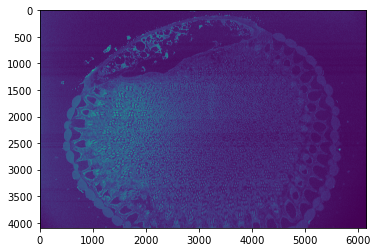

In [16]:
data = ImageController.read(file_path)
ImageController.display(data)

In [17]:
data_crop = ImageController.center_crop(data)

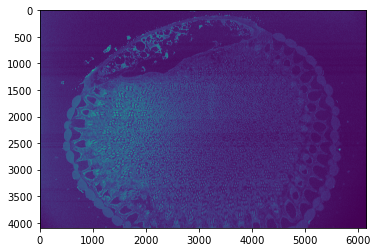

In [18]:
normalized_data = ImageController.normalize(data)
ImageController.display(normalized_data)

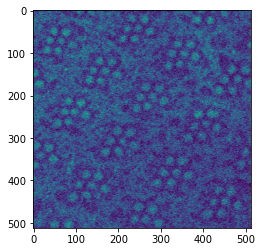

In [19]:
crop_data = ImageController.center_crop(normalized_data)
ImageController.display(crop_data)

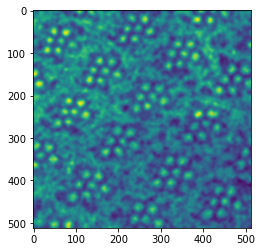

In [20]:
smoothed_data = ImageController.smooth(crop_data)
ImageController.display(smoothed_data)

In [49]:
threshold_data = ImageController.threshold(smoothed_data, threshold_value=45)

In [50]:
labeled_data, nr_count = ImageController.label(threshold_data)

In [51]:
selected_labeled_data = ImageController.select_large_regions(labeled_data, region_size=750)

In [52]:
binary_mask_data = ImageController.binary_mask(selected_labeled_data)

In [53]:
closed_binary_mask_data = ImageController.close_binary_mask(binary_mask_data)

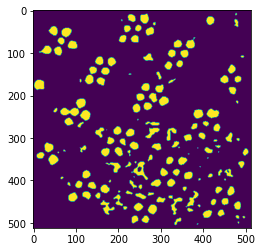

In [54]:
segmented_image = ImageController.binary_image(closed_binary_mask_data)
ImageController.display(segmented_image)

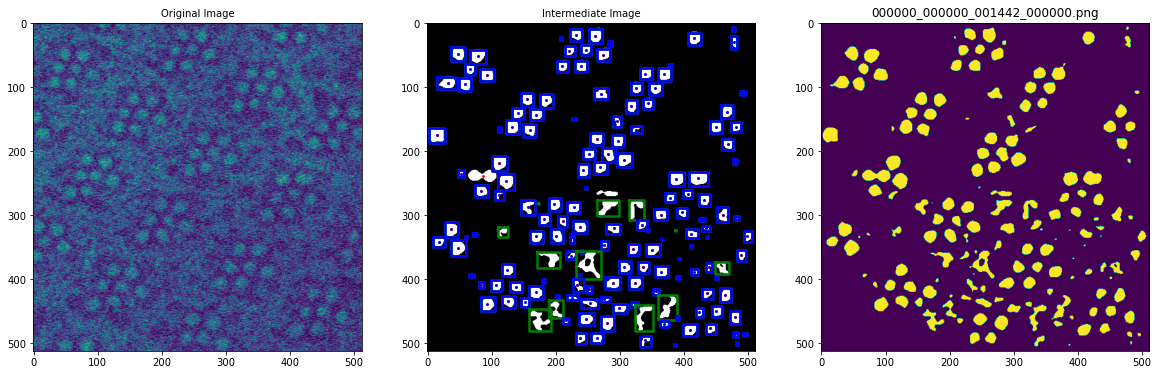

In [55]:
ImageController.display_and_save_compare_labeled(data_crop, binary_mask_data, segmented_image, plot_path)